# 5.3 Translating matrices

In [25]:
%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

from ch05.vectors import *
from ch05.transforms import *
from ch05.vector_drawing import *
import ch05.vector_drawing as vd
from ch05.draw3d import *
from ch05.funcions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Testing out translations done in linear way vs non linear way:

In [7]:
def non_linear_translate(t, v):
    return add(t, v)

def linear_translate_2d(xDelta, yDelta, v2d):
    x,y = v2d
    v = (x, y, 1)
    matrix = (
        (1, 0, xDelta),
        (0, 1, yDelta),
        (0, 0, 1)
    )

    result = multiply_matrix_vector(matrix, v)
    return (result[0], result[1])

u = (1, 1, 1)
v = (1, 1, 1)
delta = (3, 1, 0)
a = add( non_linear_translate(delta, u), non_linear_translate(delta, u) )
b = non_linear_translate( delta, add(u, v) )

print("non linear, T(u) = %s, T(v) = %s" % (str(non_linear_translate(delta, u)), str(non_linear_translate(delta, v))))
print("Non linear, T(u) + T(v) = %s, T(u+v) = %s" % (str(a), str(b)))

u = (1, 1)
v = (1, 1)
a = add( linear_translate_2d(3, 1, u), linear_translate_2d(3, 1, v) )
b = linear_translate_2d(3, 1, add(u, v))
print("Linear, T(u) + T(v) = %s, T(u+v) = %s" % (str(a), str(b)))

#OK, looks like this shit isn't linear

non linear, T(u) = (4, 2, 1), T(v) = (4, 2, 1)
Non linear, T(u) + T(v) = (8, 4, 2), T(u+v) = (5, 3, 2)
Linear, T(u) + T(v) = (8, 4), T(u+v) = (5, 3)


Exercise 5.27: Come up with a matrix to translate the dinosaur by -2 units in the x direction and -2 units in the y
direction. Execute the transformation and show the result.

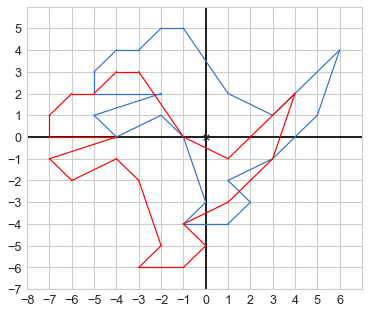

In [28]:

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]
dino_3d = [(x, y, 1) for (x, y) in dino_vectors]

matrix = (
    (1, 0, -2),
    (0, 1, -2),
    (0, 0, 1)
)

dino_transformed = [multiply_matrix_vector(matrix, v) for v in dino_3d]
dino_transformed = [(v[0], v[1]) for v in dino_transformed]


draw(
    vd.Polygon(*dino_vectors, color = blue),
    vd.Polygon(*dino_transformed, color = 'red'),
)